In [1]:
# !pip install pandas numpy matplotlib seaborn scipy

In [46]:
import pandas as pd
import numpy as np
import random
from multiprocessing import Pool
import matplotlib.pyplot as plt
from scipy.stats import norm, f_oneway, ttest_ind
import seaborn as sns

## Считывание df

In [3]:
df = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
df
# Ссылка на датасет https://www.kaggle.com/datasets/jameslko/gun-violence-data

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

### Добавление случайного времени

In [4]:
def add_random_time(date_str):
    random_time = f"{random.randint(0, 23):02}:{random.randint(0, 59):02}:{random.randint(0, 59):02}"
    return f"{date_str} {random_time}"
df['date'] = df['date'].apply(add_random_time)

### Добавление дубликатов

In [5]:
num_duplicates = int(len(df) * 0.1)
duplicates = df.sample(n=num_duplicates, replace=True)
df = pd.concat([df, duplicates], ignore_index=True)
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01 03:38:17,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01 15:02:41,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01 20:55:01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05 18:16:37,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07 16:00:05,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263639,979097,2017-11-03 13:05:39,New York,Bronx,Bronx Blvd and E 224th St,1,0,http://www.gunviolencearchive.org/incident/979097,http://www.ajc.com/news/national/video-young-f...,False,...,0::22,0::Adult 18+,0::Male||1::Male||2::Male,0::Raul Melendez,NaN,0::Killed,0::Victim||1::Subject-Suspect||2::Subject-Suspect,http://www.nydailynews.com/new-york/bronx/man-...,83.0,36.0
263640,1022862,2018-01-05 23:51:52,Iowa,Mason City,S Taft Ave and IA 122,0,0,http://www.gunviolencearchive.org/incident/102...,http://globegazette.com/news/local/crime-and-c...,False,...,0::34,0::Adult 18+,0::Female,0::Aerial Jeanne Miller,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://globegazette.com/news/local/crime-and-c...,53.0,27.0
263641,332429,2015-04-29 00:27:17,Florida,Daytona Beach,127 S. Ocean Ave.,0,0,http://www.gunviolencearchive.org/incident/332429,http://www.news-journalonline.com/article/2015...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.news-journalonline.com/article/2015...,25.0,8.0
263642,415868,2015-09-18 02:34:34,Alabama,Birmingham,7500 block of 66th Street South,0,2,http://www.gunviolencearchive.org/incident/4

### Изучение датасета на наны

In [6]:
df.isna().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         18065
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        515
incident_url_fields_missing         0
congressional_district          13132
gun_stolen                     109600
gun_type                       109548
incident_characteristics          353
latitude                         8697
location_description           217319
longitude                        8697
n_guns_involved                109548
notes                           89088
participant_age                101621
participant_age_group           46407
participant_gender              40116
participant_name               134676
participant_relationship       246285
participant_status              30463
participant_type                27418
sources     

### Удаление нан столбцов и строк с критически важными столбцами в которых есть наны

In [7]:
def drop_na(df):
    threshold = 0.5  
    columns_to_keep = df.columns[df.isna().mean() < threshold]
    
    # Удаляем строки с нанами только в оставшихся критически важных столбцах
    critical_columns = ['incident_id', 'date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'source_url', 'incident_characteristics', 'latitude', 'longitude']
    return df[columns_to_keep].dropna(subset=critical_columns)

### Остальные функции для очистки датасета

In [8]:
def remove_duplicates(df):
    return df.drop_duplicates()

def remove_non_numeric_rows(df):
    numeric_check = df.applymap(lambda x: any(char.isdigit() for char in str(x)) if pd.notnull(x) else False)
    df[~numeric_check.any(axis=1)] = np.nan
    return df

def filter_time_range(df):
    def is_in_time_range(date_str):
        try:
            time = pd.to_datetime(date_str).time()
            return not (1 <= time.hour <= 3)
        except:
            return True
    return df[df['date'].apply(is_in_time_range)]

# Не юзал ибо датаспелл вис(
def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    with Pool(n_cores) as pool:
        df = pd.concat(pool.map(func, df_split))
    return df


In [9]:
df_cleaned = drop_na(df)
df_cleaned = remove_duplicates(df_cleaned)
df_cleaned = remove_non_numeric_rows(df_cleaned)
df_cleaned = filter_time_range(df_cleaned)

C:\Users\Роман Ковалёв\AppData\Local\Temp\ipykernel_24948\1602921833.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_check = df.applymap(lambda x: any(char.isdigit() for char in str(x)) if pd.notnull(x) else False)


In [10]:
df_cleaned

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district
1,460726,2013-01-01 15:02:41,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01 20:55:01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05 18:16:37,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07 16:00:05,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07 18:02:52,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,NaN,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239671,1082061,2018-03-31 19:07:22,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,False,...,1.0,DV call leads to seizure of firearms during ar...,0::48,0::Adult 18+,0::Male,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0
239673,1083139,2018-03-31 09:56:03,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31 05:35:24,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,1.0,NaN,0::21,0::Adult 18+,0::Male,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31 14:27:50,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.

## Расчёт метрик

In [11]:
df_cleaned['hour'] = pd.to_datetime(df_cleaned['date']).dt.hour

hourly_metrics = df_cleaned.groupby('hour').agg(
    unique_strings=('state', 'nunique'),
    mean_numeric=('n_killed', 'mean'),
    median_numeric=('n_killed', 'median')
)

hourly_metrics.reset_index(inplace=True)
hourly_metrics

,hour,unique_strings,mean_numeric,median_numeric
0,0,51,0.243890,0.0
1,4,51,0.251091,0.0
2,5,51,0.241539,0.0
3,6,51,0.238582,0.0
4,7,51,0.254400,0.0
5,8,51,0.247806,0.0
6,9,51,0.247379,0.0
7,10,51,0.244947,0.0
8,11,51,0.248649,0.0
9,12,51,0.244922,0.0


## SQL Запрос

In [12]:
"""
SELECT 
    EXTRACT(HOUR FROM date) AS hour,
    COUNT(DISTINCT state) AS unique_strings,
    AVG(n_killed) AS mean_numeric,
    MEDIAN(n_killed) AS median_numeric
FROM table
GROUP BY EXTRACT(HOUR FROM date)
ORDER BY hour;
"""

'\nSELECT \n    EXTRACT(HOUR FROM date) AS hour,\n    COUNT(DISTINCT state) AS unique_strings,\n    AVG(n_killed) AS mean_numeric,\n    MEDIAN(n_killed) AS median_numeric\nFROM table\nGROUP BY EXTRACT(HOUR FROM date)\nORDER BY hour;\n'

### Мёрж метрик

In [13]:
df_cleaned['hour'] = pd.to_datetime(df_cleaned['date']).dt.hour

df_merged = pd.merge(
    df_cleaned,
    hourly_metrics,
    on='hour',
    how='left'
)

df_merged

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,hour,unique_strings,mean_numeric,median_numeric
0,460726,2013-01-01 15:02:41,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,15,51,0.246429,0.0
1,478855,2013-01-01 20:55:01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,20,51,0.248396,0.0
2,478925,2013-01-05 18:16:37,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,18,51,0.254310,0.0
3,478959,2013-01-07 16:00:05,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,16,51,0.238365,0.0
4,478948,2013-01-07 18:02:52,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,18,51,0.254310,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201753,1082061,2018-03-31 19:07:22,Washington,Spokane (Spokane Valley),12600 block of N Willow Crest Ln,0,0,http://www.gunviolencearchive.org/incident/108...,https://www.kxly.com/news/domestic-violence-su...,False,...,0::Male,"0::Unharmed, Arrested",0::Subject-Suspect,https://www.kxly.com/news/domestic-violence-su...,4.0,4.0,19,51,0.241336,0.0
201754,1083139,2018-03-31 09:56:03,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,9,51,0.247379,0.0
201755,1083151,2018-03-31 05:35:24,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::Male,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,5,51,0.241539,0.0
201756,1082514,2018-03-31 14:27:50,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::Male,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,14,51,0.252294,0.0


# Аналитические метрики

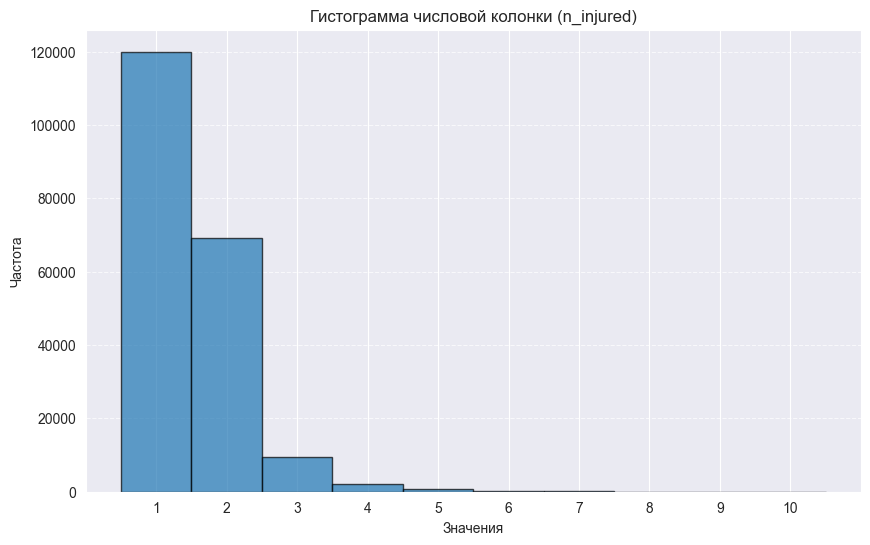

In [14]:
numeric_column = df_cleaned['n_injured'].dropna()[df_cleaned['n_injured'] < 10]

plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(numeric_column, bins=10, edgecolor='black', alpha=0.7)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, labels=np.arange(1, 11))
plt.title("Гистограмма числовой колонки (n_injured)")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Использовал метод стандартной ошибки среднего значения SEM
mean = np.mean(numeric_column)
std_error = np.std(numeric_column, ddof=1) / np.sqrt(len(numeric_column))
confidence_interval = norm.interval(0.95, loc=mean, scale=std_error)
# Нормальное распределение используется, поскольку размер выборки достаточен, и мы предполагаем, что данные примерно нормальны.
mean, std_error, confidence_interval

(0.49149601693360895,
 0.0015679487767850185,
 (0.48842289380150666, 0.49456914006571123))

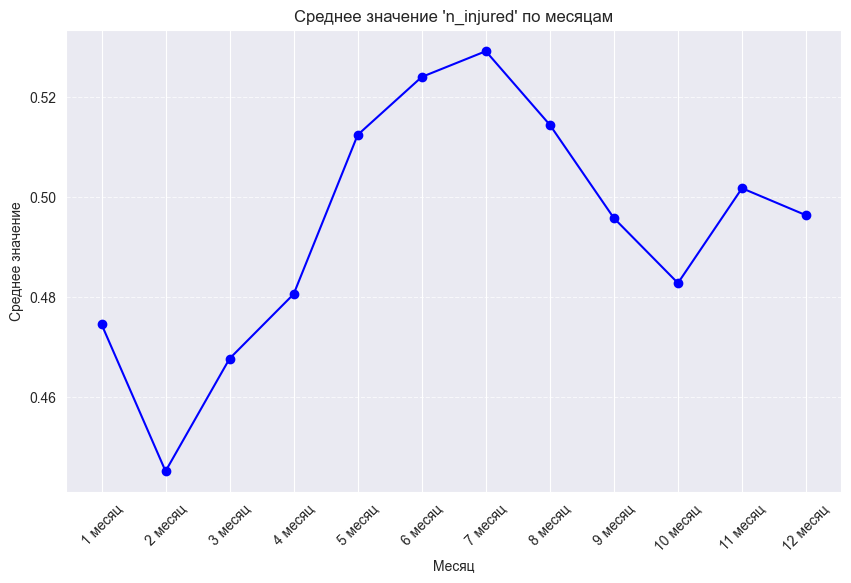

In [16]:
# 1. Среднее значение numeric колонки по месяцам
df_cleaned['month'] = pd.to_datetime(df_cleaned['date']).dt.month
monthly_mean = df_cleaned.groupby('month')['n_injured'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-', color='b')
plt.title("Среднее значение 'n_injured' по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее значение")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=monthly_mean.index, labels=[f"{month} месяц" for month in monthly_mean.index], rotation=45)
plt.show()

### Не большой комментарий по графику
- Большая часть преступлений приходит на лето
- Летом много туристов приезжает и вероятно того, что их будут грабить
- Люди чаще находятся на улице в летний период, что увеличивает вероятность межличностных взаимодействий, включая конфликтные ситуации.
- Подростки и молодёжь проводят больше времени без контроля взрослых, что может увеличивать вероятность совершения мелких или серьёзных правонарушений.


## Хитмапа

In [39]:
df_cleaned['month'] = pd.to_datetime(df_cleaned['date']).dt.month
state_monthly_counts = df_cleaned.groupby(['state', 'month']).size().unstack(fill_value=0)

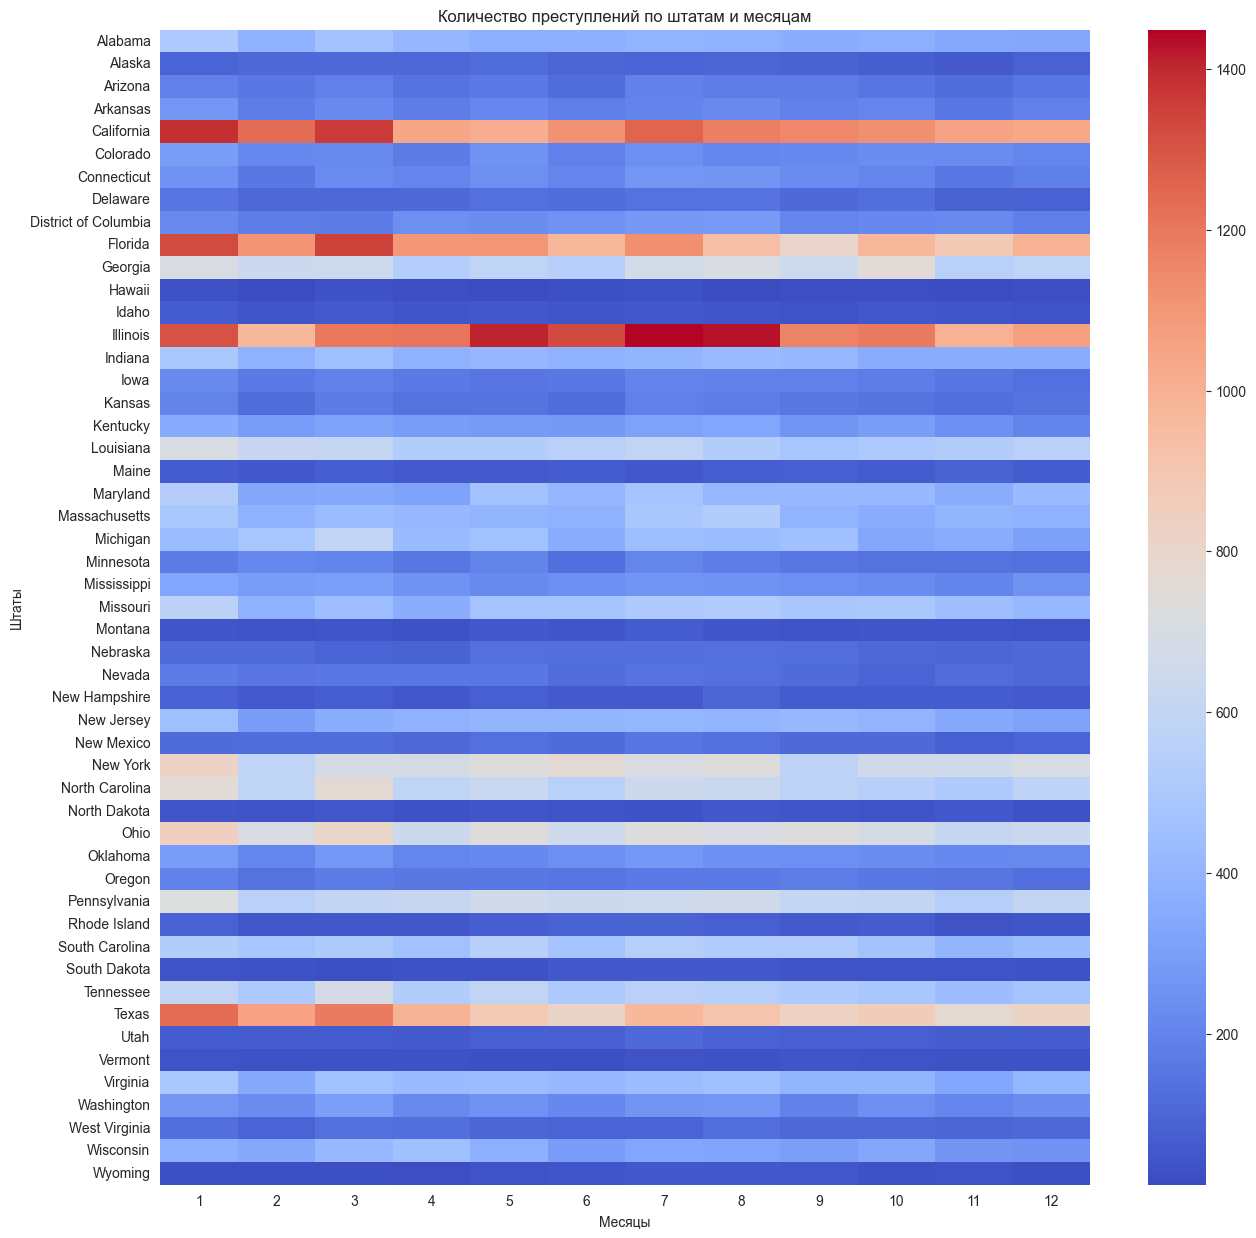

In [45]:
plt.figure(figsize=(15, 15))
sns.heatmap(state_monthly_counts, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Количество преступлений по штатам и месяцам")
plt.xlabel("Месяцы")
plt.ylabel("Штаты")
plt.show()

# Доп задание

## Разделение датасета на три части

In [47]:
# Сначала скидываем индексы, чтобы избежать потенциальных проблем при разделении
df_cleaned = df_cleaned.reset_index(drop=True)

total_rows = len(df_cleaned)
split_1 = int(total_rows * 0.25)  
split_2 = int(total_rows * 0.5 + split_1)

df_part1 = df_cleaned.iloc[:split_1]
df_part2 = df_cleaned.iloc[split_1:split_2]
df_part3 = df_cleaned.iloc[split_2:]

## Выбираем числовую колонку для анализа

In [48]:
part1_numeric = df_part1['n_injured'].dropna()
part2_numeric = df_part2['n_injured'].dropna()
part3_numeric = df_part3['n_injured'].dropna()

len(part1_numeric) == 0 or len(part2_numeric) == 0 or len(part3_numeric) == 0

False

### Проверка статистической значимости различий с помощью ANOVA

In [49]:
f_oneway(part1_numeric, part2_numeric, part3_numeric).pvalue

3.1474379372656073e-38

### Оценка силы эффекта

In [51]:
def cohens_d(x, y):
    diff = abs(np.mean(x) - np.mean(y))
    pooled_std = np.sqrt(((len(x) - 1) * np.var(x, ddof=1) + (len(y) - 1) * np.var(y, ddof=1)) / (len(x) + len(y) - 2))
    return diff / pooled_std

cohens_d(part1_numeric, part3_numeric)

0.05336425956259618

### Байесовский подход

In [52]:
# Вычисляем параметры постериорного распределения для разницы средних
prior_mean_1 = np.mean(part1_numeric)
prior_mean_3 = np.mean(part3_numeric)
prior_std_1 = np.std(part1_numeric, ddof=1)
prior_std_3 = np.std(part3_numeric, ddof=1)

# Постериорное среднее и дисперсия
posterior_mean_diff = prior_mean_1 - prior_mean_3
posterior_variance_diff = (prior_std_1 ** 2 / len(part1_numeric)) + (prior_std_3 ** 2 / len(part3_numeric))
posterior_std_diff = np.sqrt(posterior_variance_diff)

# 95% доверительный интервал для постериорного распределения
(
    posterior_mean_diff - 1.96 * posterior_std_diff,
    posterior_mean_diff + 1.96 * posterior_std_diff
)

(-0.04793155140189231, -0.029925001293043325)

### ANOVA:
- Используется для проверки нулевой гипотезы о равенстве средних значений между тремя группами
### Cohen's d:
- Cohen's d позволяет оценить величину эффекта, что помогает понять практическую значимость разницы.
### Байесовский подход
- Байесовский подход используется для дополнительного анализа, так как он предоставляет интерпретацию результатов в терминах вероятностей

### ANOVA:
- Результат указывает на статистически значимые различия между средними значениями групп
### Cohen's d:
- Значение Cohen's d говорит о крайне слабом эффекте, значительно меньше порога для малого эффекта(0.2). Разница между группами практически не имеет практического значения
### Байесовский подход:
- Указывает, что среднее первой группы чуть ниже третьей. Узкий доверительный интервал подтверждает уверенность в минимальной, но стабильной разнице

# Доп задание 2

#### Основной вызов: у нас нет ни одного успешного кейса от нашей компании. Мы не знаем, является ли 0 успешных из 200 результатом «невезения» или же вероятность успеха действительно очень мала. Любая оценка будет базироваться на некоторых предположениях или дополнительных данных

#### Подход 1. Частотная оценка вероятности успеха
Простейший подход — использовать эмпирический метод:
- Данные нашей компании: 0 успешных из 200 прототипов.
- Эмпирическая вероятность успеха: p = 0/200 = 0.
Однако такой подход даёт вероятность 0, что очевидно нереалистично с точки зрения предикции будущего

#### Подход 2. Байесовская оценка с априорным распределением
Представим, что вероятность успеха каждого прототипа компании является некоторой величиной p. Для вероятностей успеха часто используется Бета-распределение как априорное распределение для параметра p
- Выбираем априор для p, например, Beta(a, b). Без предварительных знаний можно взять неинформативный априор, например Beta(1,1), который соответствует равномерному распределению вероятности успеха в интервале [0,1]
- После наблюдения n испытаний (в нашем случае n=200) с k успехами (k=0), постериорное распределение для p будет Beta(a + k, b + n - k) = Beta(1 + 0, 1 + 200 - 0) = Beta(1, 201)
- Для прогноза следующего результата можно взять ожидаемое значение p из постериорного распределения. Для Beta(a, b) мат.ожидание равно a / (a + b).
- E[p] = 1 / (1 + 201) = 1/202 = 0,00495

Таким образом, по байесовскому подходу при выборe априора Beta(1,1) вероятность успеха следующего прототипа составляет примерно 0,00495(0,5%), что, интересно, близко к оценке, полученной на основе данных конкурента

Какие данные были бы полезны для этого метода:
- Информация о схожести проектов нашей компании с проектами конкурента(можно ли считать вероятность успеха близкой)
- Дополнительные метрики качества прототипов, гипотезы об их рыночных нишах, цели и тестовые метрики

#### Подход 3. Фрементная оценка с применением статистических тестов или mle
Доверительный интервал (например, 95%) при k=0 и n=200 для p будет примерно:
- Нижняя граница: 0.0
- Верхняя граница

Это означает, что с 95% уверенностью истинная вероятность успеха находится в интервале [0, 0.0147] 
Но это не даёт точной точечной оценки без дополнительных предположений
То есть для решения данным методом требуется больше доп данных

Для более полной картины могут понадобиться:
- Частота успеха стартапов или прототипов
- Информацию о временных тенденциях


#### Если говорить об ответе, то я бы склоанялся к варианту 0,5%